# Chapter 6: Bio-inspired optimization

*Selected Topics in Mathematical Optimization*

*2016-2017*

**Bernard De Baets**

**Michiel Stock**

**Raúl Pérez-Fernández**

***Joke Ampe - Second Master in Bio-informatics***

![Yes, this is how it works...](Figures/evolve_alg.gif)

In [1]:
from random import random, choice
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
%matplotlib inline

## Introduction and general idea

The open (or obsessive) mind can find optimization everywhere in the world around him. Ants find the optimal paths from food to their nest, rivers stream to maximize their water flow, plants maximize the amount of sunlight captured with their leafs and many of the laws of physics can be formulated as a minimization of energy. Bio-inspired optimization, or bio-inspired computing in general, borrows ideas from nature to solve complex problems. A central theme among these paradigms is that they use simple, local manipulations from which the general computation is an emergent property. Many also make use of a **population** of candidate solutions which is improved iteratively.

Bio-inspired optimization algorithms (BIOAs) are often applied for more complex problems discussed so far. Many real-word problems are often over-or underconstrained, lack detailed information about the target function (e.g. no gradient can be computed) or deal with complex 'structured data'. Examples of such problems which (bio)engineers routinely deal with include designing an antenna, callibrating a forest fire model or create a new functional peptide (topic of this project).

Contrary to most of the algorithms discussed so far, BIOAs often lack theoretical guarantees, both on their running time and on the quality of the solution. It is not uncommon to let such algorithms run for days or weeks. Since these algorithms do not exploit the structure or the gradient of the target function, only function evalutions are used. This is especially costly when evaluating the target function is expensive, for example when determining the parameters of a large set of ordinary differential equations. Furthermore, most bio-inspired optimization algorithms have some hyperparameters which must be tuned to the problem, otherwise the optimization might run badly.

Despite these drawbacks, BIOAs also have many merits. Because they are very flexible, they can be applied to almost any optimization problem. For some problem classes (such as NP-hard problems), there are no efficient exact solvers, making for example the traveling salesman problem unsolvable for moderately large instances using standard techniques. BIOAs on the other hand can often generate reasonable solutions quite quickly. Furthermore, BIOAs work **progressive**, meaning that intermediate solutions can be obtained at any time. Hence, even if the optimization process is prematurely aborted, we still have some result to show for our effort.

BIOA come in [many flavors](https://arxiv.org/pdf/1307.4186.pdf), which is one of the reasons why some of researchers dislike them. An important class of algorithms try to mimic swarm intelligence, for example how ants find their way in their surroundings is implemented in ant colony optimization. In this project we will work with genetic algorithms (GAs), which are based on the most succesful optimization algorithm in nature: evolution. GAs use *in silico* evolution to obtain iteratively better solutions for a problem. Most GAs are based on the following four concepts:
- **maintenance of a population**
- **creation of diversity**
- **a natural selection**
- **genetic enheritance**

![](Figures/GAconcept.png)

## Genetic representation

![Genotype, phenotype and fitness.](Figures/encoding.png)

**genotype**: reprentation of a candidate solution on which the genetic algorithm will operate

- often discrete representation (e.g. binary encoding of numbers)
- ideally covers the space of optimal solutions (prior knowledge)
- recombination should have high probability of generating increasingly better individuals

**phenotype**: the candidate solution in a representation of the problem

- **decoding**: translating genotype into phenotype
- **encoding**: translating the phenotype in genotype

Since the genetic operators of the GA only work on the genotype, only decoding has to be defined.

**fitness**: the quality of the solution, will be used to select individuals for the next generation

## Selection and reproduction

**Selection** is the procedure such that individuals with a higher fitness are more likelily to go to the next generation.

Usually the population size is fixed. individuals with high fitness are likely to be selected multiple times, those with low fitness might not be selected.

**Roulette wheel selection**

![Roulette wheel selection chooses individuals proportional to their fitness.](Figures/roulettewheel.png)

A new population of $n$ individuals is chosen by chosing individuals proportional to their fitness:

$$
p(i) = \frac{f(i)}{\sum_{j=1}^nf(j)}\,,
$$
with $p(i)$ the probability of choosing individual $i$ and $f(i)$ the fitness of individual $i$.

Drawbacks:
- only when fitness is positive
- selection process dependent on (nonlinear) scaling of fitness

**Tournament selection**

Randomly choose two individuals, retain the individual with the highest fitness for the population of the next generation (pick one at random if fitness is equal). Repeat as many times as there are individuals in the population.

Below is an illustration of the two types of selection.

In [2]:
# generate random initial population
population_fitness = [np.random.randn()**2 for _ in range(1000)]

In [3]:
# roulette wheel selection
population_fitness_roulette = []
finess_sum = np.sum(population_fitness)
while len(population_fitness_roulette) < len(population_fitness):
    fitness = choice(population_fitness)
    if fitness / finess_sum > random():
        population_fitness_roulette.append(fitness)

In [4]:
# tournament selection
population_fitness_tournament = []
while len(population_fitness_tournament) < len(population_fitness):
    selected_fitness = max(choice(population_fitness), choice(population_fitness))
    population_fitness_tournament.append(selected_fitness)

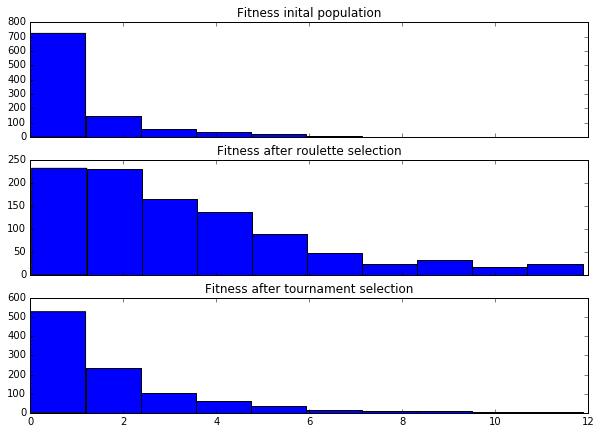

In [5]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True, figsize=(10, 7))

ax0.hist(population_fitness)
ax1.hist(population_fitness_roulette)
ax2.hist(population_fitness_tournament)

ax0.set_title('Fitness inital population')
ax1.set_title('Fitness after roulette selection')
ax2.set_title('Fitness after tournament selection')

**Elitism**: after selection and recombination, the individual with the highest fitness is often retained in the population. This way the best fitness of the population will never decrease.

## Genetic operators

Selection increases the average quality of the candidate solutions, at the cost of decreasing the 

**Recombination** is the process of bringing back diversity into the population *without any regards for fitness*.

### Mutations

- small change to the genotype
- mutations operate at the level of the individual
- example: flipping a bit in a binary representation
- example: adding a normally distributed number to a real value

### Crossover

**Crossover** recombined two individuals (parents) into two children by randomly switching parts of the genotype

Types of crossover:
- **one-point**: select randomly a crossover point on each of the two strings and swapping around this point
- **multipoint**: the same, but with $n$ crossover points
- **uniform**: each element is switched between the parents with a certain probability (usually 50%)
- specialised crossovers for graphs, cycles or trees

![Examples of simples crossover.](Figures/crossover.png)

## Algorithms

### Hill climbing

- iterative improvement of starting point
- converges to local optimum (dependent on starting position)
- usually executed multiple times with different initial conditions

```
Hill climbing algorithm
    choose a random current_solution
    local := FALSE  // assume solution is not in local optimum
    
    while local is FALSE:
        set local to TRUE
        for all neighbors of current_solution:
            if neighbor improves current_solution:
                set local to FALSE
                current_solution := neighbor
                
    return current_solution
```

**Advantages**:
- easy to implement
- only needs the scoring function and a definition of neighborhood to search

**Disadvantages**:
- converges to a local optimum that is dependent of the starting position
- no guarantees on the quality of the solution
- no guarantees on the running time

### Simulated Annealing

- instead of scanning the whole neighborhood, one candidate solution is randomly chosen
    - if the new solution has a higher fitness: accept it
    - if it has a lower fitness, accept with probability $e^{\Delta f / T}$
- the temperature $T$ controls the **exploration** vs **exploitation** trade-off
- the temperature is gradually decreased when running the algorithm

```
Simulated annealing algorithm(Tmax, Tmin, r, kT)
    choose random initial point x
    T := Tmax
    while T > Tmin
        repeat kT times
            randomly choose xn from neigborhood of x
            if f(xn) > f(x)
                x := xn
            else with probability exp( (f(xn) - f(x))/T )
                x := xn
         T := T * r
    return x  
```

**Example of simulated annealing**

$$
\min_x\ f(x) = |x\cos(x)| + \frac{|x|}{2}\,.
$$

During each step, a new candidate solution is selected randomly according to

$$
x_n = x + \Delta x\,,
$$
with
$$
\Delta x \sim N(0, \sigma)\,.
$$

Wall time: 774 ms


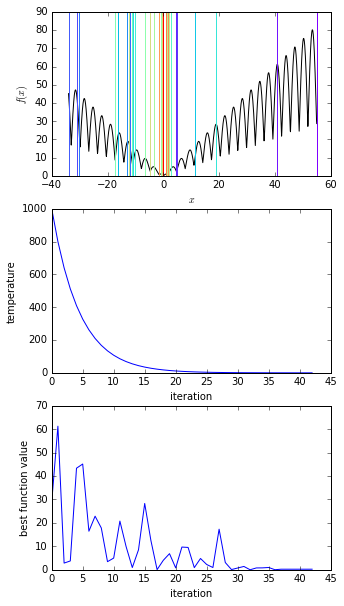

In [6]:
%%time

from simulated_annealing_demo import plot_SA_example

f_toy_example = lambda x : np.abs(x * np.cos(x)) + 0.5 * np.abs(x)
x0 = 55
hyperparameters = {'Tmax' : 1000, 'Tmin' : 0.1,
                    'r' : 0.8, 'kT' : 10, 'sigma' : 5}

plot_SA_example(f_toy_example, x0, hyperparameters)

### Genetic algorithm

```
Genetic algorithm(population size, number of generations, pmut, pcross)
    initialize a random population
    repeat for a number of generations
        use tournament selection to generate a new population
        recombinate the new population using mutations and crossover
        apply elitism
    return best individual of final population
```

## Project: Designing bio-active peptides

Some peptides have an anti-microbial function. These peptides originate from the innate immuum system and are found in nearly all classes of life. These peptides often have a general mode of action and are thus effective against a broad range of microorganisms and it is quite difficult to acquire resistence for these organisms. As such they are an attractive alternative to conventional antibiotics.

![Two possible mechanisms how a peptide can target a bacterial cell.](Figures/Modes_of_action.png)

In this project we will use genetic algorithms (in the very broad sense) to design and optimize a novel anti-microbial peptide. For this, we have downloaded a fasta file containing the amino acid sequence of over two thousand anti-microbial peptides as a reference set from the [Collection of Anti-Microbial Peptides](http://www.camp.bicnirrh.res.in/) database. Using a machine learning technique called kernel embedding, we have modelled the distribution of these peptides. This model can be used to generate a score between 0 and 1 for a given peptide, representing our belief that the peptide has an anti-microbial function (higher is better). The model is externally developed and is to us a black box.

For example:

In [7]:
from anti_microbial_peptide_model import score_peptide

Loading the sequences...
Loading the features...
Finished!


In [8]:
print(score_peptide('ASRTYUIPUYGRVHHGY'))  # a random peptide

6.35396112848e-05


In [9]:
print(score_peptide('SKITDILAKLGKVLAHV'))  # a peptide from the database

0.00770537270675


In [10]:
%timeit score_peptide('ASRTYUIPUYGRVHHGY')  # time to score a peptide

1000 loops, best of 3: 2.23 ms per loop


We will try to find a new peptide with a length of twenty amino acids with the highest possible score according to the given model. To this end, hill climbing, simulated annealing and genetic algorithms will be used.

For the problem setting at hand, we clarify the following terminology:
- The **neigborhood** of a peptide: the set of all peptides which differ with exactly one amino acid compared to the given peptide
- When a **mutation** occurs, a residue of a peptide is replaced by a randomly chosen amino acid. In our implementation of simulated annealing and the genetic algorithm, each amino acid in a peptide has a small fixed probability `pmut` to be mutated.
- During a **crossover** event between two peptides, at each position the corresponding residues of the peptides are either switched or remain unchanged with equal probability. Crossovers occur between two randomly selected individuals with a probability `pcross`.

**Assignment 1**

Complete the implementation of the function `hill_climbing` to bring either a given peptide or a randomly generated peptide of a given length to a local optimum. Run the algorithms ten times to generate optimized peptides of length twenty. What scores do you get? Describe these plots.

In [11]:
from protein_sequence_features import amino_acids
amino_acids  # the amino acids

['N',
 'P',
 'V',
 'K',
 'F',
 'I',
 'W',
 'T',
 'L',
 'A',
 'S',
 'H',
 'E',
 'Q',
 'R',
 'M',
 'C',
 'G',
 'Y',
 'D']

In [12]:
def explore_peptide_region(peptide, scoring):
    """
    Searches all neighboring peptides of a given peptide that differ exactly one
    amino acid
    """
    # complete this
    best_peptide = peptide
    best_score = scoring(peptide)
    
    for i in range(0, len(peptide)): 
        for j in amino_acids:
            current_pep = list(peptide)
            if i != j:
                current_pep[i] = j
                current_score = scoring(current_pep)
            else:
                continue
            if current_score > best_score:
                best_peptide = current_pep
                best_score = current_score
                
    return best_score, "".join(best_peptide)

In [13]:
explore_peptide_region('SKITDILAKLGKVLAHV', score_peptide)

(0.01435662140704122, 'SIITDILAKLGKVLAHV')

In [14]:
def hill_climbing(peptidesize=None, peptide=None, scoring=score_peptide):
    """
    Uses hill climbing to find a peptide with a high score for
    antimicrobial activity.

    Inputs:
        - peptidesize : give size if stated from a randon peptide
        - peptide : optionally give an intial peptide to improve
        - scoring : the scoring function used for the peptides

    Outputs:
        - peptide : best found peptide
        - best_scores : best scores obtained through the iterations
    """
    
    # one of the two (peptidesize of peptide) should be given
    assert peptidesize is not None or peptide is not None
    # if no peptide is made, give a random one
    if peptide is None:
        peptide = ''
        for res in range(peptidesize):
            peptide += choice(amino_acids)
    else:
        peptidesize = len(peptide)
        
    best_scores = [scoring(peptide)]
    peptides = [peptide]
    
    #actual algorithm
    while True:
        new_score, new_peptide = explore_peptide_region(peptides[-1], scoring)
        # if the new_score is better --> continue in while loop with new peptide as start
        if new_score > best_scores[-1]:
            peptides.append(new_peptide)
            best_scores.append(new_score)
        # if it's not --> the algorithm is converged, break the while loop
        else:
            break
    return peptides[-1], best_scores

0.0329409214896 ILGTIIASILEEIAETEHHT
0.0288368114445 IASIVNEIHHHYHEEPHAFL
0.0310233302601 YDHFHDYLQEMICTVIIVSV
0.0326688603412 VEDFLDQFLDVVIIMGVITT
0.0294331756099 TQKDYYDDYDRYPDEFQDAI
0.0305451333944 IAGIISAIVHQLHHPPHQPF
0.0234005090135 HDQYRDYFDEMYMISTLIEY
0.0322590531979 FHHLFNVIVGAIITEVAAWI
0.031897616651 FITAVAVASFLAALLHQLFD
0.0323185618058 IVGVITALITHLPDHLFHAV
Wall time: 2min 41s


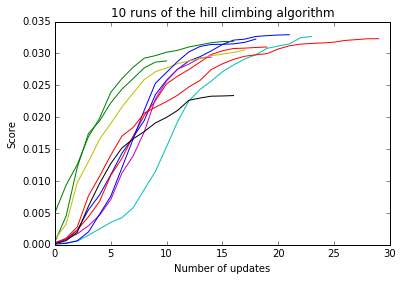

In [15]:
%%time 
# perform 10 runs of algorithm with no initial peptide (randomly generated)
for i in range(10):
    best_pep, best_scores = hill_climbing(peptidesize=20, peptide=None, scoring=score_peptide)
    print(best_scores[-1], best_pep)
    plt.plot(best_scores)
    plt.title('10 runs of the hill climbing algorithm')
    plt.xlabel('Number of updates')
    plt.ylabel('Score')
plt.show
# make a plot of the running of hill climbing 
# for ten runs

COMMENT ON THIS PLOT? HOW ARE THE DIFFERENT RUNS THE SAME AND WHAT DO THEY HAVE IN COMMON?

The different plots have in common that they improve fast initialy, the score goes up quickly. In the end, the plots flatten a bit, indicating that we are close to local optimum. Another thing that is general is that the plots never go down, the scores only go up. This is off course obvious in the definition of the algorithm, but it also explains why we end up in different optima. Once a certain direction was chosen to go up, we can never choose another that goes down from the current point anymore. This is a property that makes hill climbing a bit less suited for certain problems where there are a lot of local optima or where the 'way to the top' is not straight up but comes as a 'bumpy surface'. 

What stands out is the fact that the optimal score that we find in the end is quite different between the different runs, indicating that we reach local optima, rather than a global optimum. If we would reach the global optimum, all the plots would eventually end up in the same point with the highest score possible. Because of this, it is interesting to perform multiple runs starting in different points. Otherwise, we could end up in a rather bad (local) optimum just by coincidently starting in a bad point.  

The optimal peptide found with hill climbing will depend on the run, since it starts from random peptides. We can look in the list and search for the highest score and the corresponding peptide. When I ran the notebook at home, the best peptide was 'ILGTIIASILEEIAETEHHT', with a score of around 0.3294.

**Assignment 2**

Hill climbing greedily improves the given peptide until no single change of in amino acid residus increases the score. The solution of hill climbing is likely to be a local optimum (and not necessarily a good one!).

We will try to generate better peptides using simulated annealing (which only uses mutations to generate diversity in the candidate solutions) and a genetic algorithm (which uses both mutations as well as crossover to generate novel peptides). 

1. Complete the functions to generate diversity in the peptides. The function `mutate_peptide` takes a peptide as input and returns a new peptide where each amino acid is changed by a randomly chosen other peptide with a probability `pmut`. The function `crossover_peptides` requires two peptides of equal length as input and outputs the corresponding random crossover peptides.
2. Complete the function `simulated_annealing` to optimize random peptide of fixed length. Try to find an optimal peptide of length twenty. Discuss how to choose good values for `Tmin`, `Tmax`, `r` and `kT`.
3. Finally, complete the function `genetic_algorithm`. You also have to complete the functions `tournament_selection` and `recombinate` which will be used in the main algorithm. Try to find the an optimal peptide of length twenty as well, using some trial and error to find the hyperparameters. 
4. Compare the quality of the solution using hill climbing, simulated annealing and the genetic algorithm. If you take code complexity and computation time into account, which would you try first for general problems?

In [16]:
def mutate_peptide(peptide, pmut=0.05):
    """
    Replaces each amino acid of the peptide with an arbitrary chosen
    amino acid with a probability pmut
    """
    peptide = list(peptide)
    mut = peptide.copy()
    for i in range(0, len(peptide)):
        if random() <= pmut:
            mut[i] = choice(amino_acids)
    return ''.join(mut)


def crossover_peptides(peptide1, peptide2):
    """
    Performs crossover for two peptides, each position is switched with equal
    probability.

    Inputs:
        - peptide1, peptide2

    Outputs:
        - crossed_peptide1, crossed_peptide2
    """

    pep1 = list(peptide1)
    pep2 = list(peptide2)
    cross1 = pep1.copy()
    cross2 = pep2.copy()
    for i in range(0, len(peptide1)):
        if random() > 0.5:
            cross1[i] = pep2[i]
            cross2[i] = pep1[i]
    cross1 = ''.join(cross1)
    cross2 = ''.join(cross2)
    return cross1, cross2

In [17]:
peptide1 = 'AAAAAAAAAAAA'
peptide2 = 'CCCCCCCCCCCC'

In [18]:
print(mutate_peptide(peptide1, pmut=0.3))

AYWRCAAAAFAA


In [19]:
print(*crossover_peptides(peptide1, peptide2))

ACCCCCCCCCCC CAAAAAAAAAAA


In [20]:
import math

def simulated_annealing(peptidesize, Tmax, Tmin, pmut, r, kT, scoring=score_peptide):
    """
    Uses simulated annealing to find a peptide with a high score for
    antimicrobial activity.

    Inputs:
        - peptidesize : length of the peptide
        - Tmax : maximum (starting) temperature
        - Tmin : minimum (stopping) temperature
        - pmut : probability of mutating an amino acid in the peptide
        - r : rate of cooling
        - kT : number of iteration with fixed temperature
        - scoring : the scoring function used for the peptides

    Outputs:
        - peptide : best found peptide
        - fbest : best scores obtained through the iterations
        - temperatures : temperature during the iterations
    """

    # create intial peptide
    peptide = ''
    for _ in range(peptidesize):
        peptide += choice(amino_acids)

    temp = Tmax
    fstar = scoring(peptide)
    fbest = [fstar]
    temperatures = [temp]
    
    # Actual algorithm, runs untill the T becomes too low
    while temp > Tmin:
        #predefined number of iterations in each run
        for _ in range(kT):
            xn = mutate_peptide(peptide, pmut)
            # if the score is better, accept the new peptide
            if scoring(xn) > scoring(peptide):
                peptide = xn
            # if it is not, accept it with a certain probability
            elif random() <= math.exp((scoring(xn)-scoring(peptide))/temp):
                peptide = xn
        fbest.append(scoring(peptide))  # save best value
        temperatures.append(temp)  # save best temperature
        temp = temp*r
    return peptide, fbest, temperatures

In [21]:
%%time
peptide_SA, fitness, temperature = simulated_annealing(peptidesize=20, Tmax=1e-3, Tmin=1e-9, pmut=0.1, r=0.99, kT=5, scoring=score_peptide)

Wall time: 52.7 s


0.033698802446 LPLAALLNELINVISSVIVT


<function matplotlib.pyplot.show>

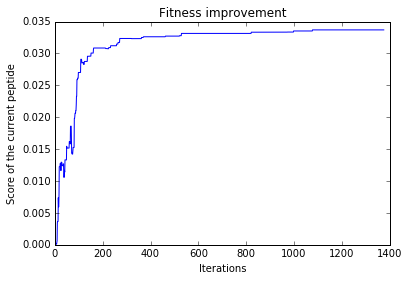

In [22]:
# make a plot for simulated annealing
print(fitness[-1], peptide_SA)
plt.plot(fitness)
plt.title('Fitness improvement')
plt.xlabel('Iterations')
plt.ylabel('Score of the current peptide')
plt.show

DESCRIBE THE EFFECT OF THE HYPERPARAMETERS. MAKE A PLOT TO ILLUSTRATE THE BEHAVIOUR BELOW.

For illustration of what is described here, please look at the plots below.

The plots of the progression of the algorithm for different values of Tmin show clearly that the smaller the Tmin, the better the scores (in general) that are reached with simulated annealing. The algorithm also needs some more iterations, which is obvious because of the constant r factor by which we multiply to reach the minimum temperature, while we start from the same maximum temperature. The relation between Tmin and optimal score found is not very tight in the sense that we can also see a better score with a higher Tmin. This is because we start from a random peptide which could coincidently be a good one. In that case we don't need as many iterations to reach a really good optimum. But in general, lower Tmin means a better solution in the end. 

For Tmax, the effect is a bit similar but a bit less pronounced (the final scores are closer together). Higher Tmax gives in general better results when using the same Tmin, probably just because less iterations are performed when Tmin and Tmax are close together. The lower effect of Tmax is because the Tmin decides the behaviour in the most crucial section of the algorithm, that is in the end when we are close to the optimum. 

In general for the choice of Tmin and Tmax, there should also be enough difference between them. If not, the number of iterations will be too small to get to a good optimum. The choice of Tmin and Tmax should thus be explored by trial and error to know the order of magnitude. After this, we should definitely choose Tmin low enough, while the choice of Tmax is a bit less important provided that there is enough difference between Tmin and Tmax.

The pmut parameter gives the best results when it is set to around 0.1. Lower as well as higher values give worse result and it seems that higher values are more severe than lower values. This means we would rather like to pick a too small value than a too big value. Probably, setting the pmut parameter too high changes the peptides too much, by which it seems that we start from a new random peptide in the next iteration.

For kT, the relation is also obvious. Higher kT means a better result. The reason of this is that we explore more options at each temperature step, so it's logical that we have a higher chance to find a good one between those. The disadvantage of picking a high kT is that the algorithm will take more time to run. We can see that for a kT of 1, the final result is rather bad. But for example the result between a kT of 9 and 11 doesn't make much difference. We could thus pick a kT at which the difference of the running of the algorithm is small compared to higher kT's, in order to save time efficiency. In this case, a kT of around 5 or 7 seems like a good choice.

The choice of r seems to have the highest influence of all. Low values of r give very bad results because the algorithm simply cannot perform enough steps to reach an optimum. Values of lower than 0.9 are certainly not an option and even 0.9 itself gives suboptimal results compared to even higher values. For the r parameter, it thus counts that the higher the value, the better. This will however take more time. But since the influence of r is so important, it might be worth it to choose a very high value of r, for example 0.99.


0.032836939824 HPLSELLIAVISGIISQIMN
0.0317176065807 MLCSIITTLIETVAVSPLTS
0.0324421094406 IIHTIIASLIGGLVQALSQI
0.0312826814694 NHMEEMPHAMISAIVSTIVA
0.031371557602 KHYHDHYHHYLDNMLQAIPA
0.0256530652986 RDYPDRWYDQFNDFYHNAHD


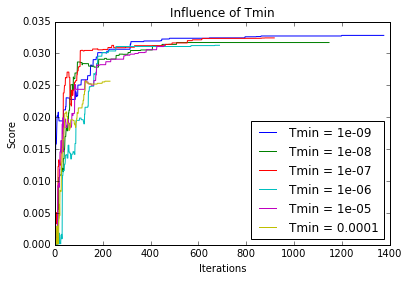

In [23]:
# EXPERIMENT WITH THE HYPERPARAMETERS OF SA HERE
# hyperparameters: Tmin, Tmax, kT, r, pmut
Tmin = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]

for i in Tmin:
    peptide_SA, fitness, temperature = simulated_annealing(peptidesize=20, Tmax=1e-3, Tmin=i, pmut=0.1, r=0.99, kT=5, scoring=score_peptide)
    print(fitness[-1], peptide_SA)
    plt.plot(fitness, label="Tmin = "+str(i))
    
plt.title('Influence of Tmin')
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.show()


0.0324560344325 QFFANVMSVILNLISAVITE
0.0318356763472 VVISSIVNQLHNHYYEDMDE
0.030121989229 NYHDKHHHNYLYDMLEEYFH
0.0318204960079 LNALIEELANLIAAIIMGTM
0.0295390917308 IVSVLSNFIHQMYDEQHHHY
0.0289022039462 NNWFDALATVLSLIIQSIME


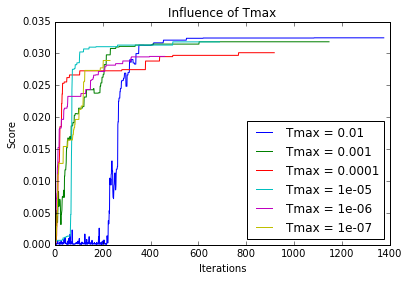

In [24]:
Tmax = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

for i in Tmax:
    peptide_SA, fitness, temperature = simulated_annealing(peptidesize=20, Tmax=i, Tmin=1e-8, pmut=0.1, r=0.99, kT=5, scoring=score_peptide)
    print(fitness[-1], peptide_SA)
    plt.plot(fitness, label="Tmax = "+str(i))
    
plt.title('Influence of Tmax')
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.show()

0.0327765897517 FIAVAMLSSIISQVVSSIYE
0.0328350190582 AILSTLLGAIIHAISEVATE
0.0273458909234 GIIGGIVELIHNLADKPYHD
0.019441033131 KDQLDCFLNKFITVVAGIVC


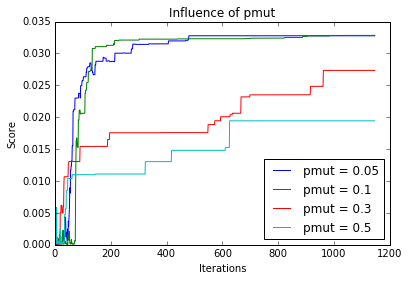

In [25]:
pmut = [0.05, 0.1, 0.3, 0.5]

for i in pmut:
    peptide_SA, fitness, temperature = simulated_annealing(peptidesize=20, Tmax=1e-3, Tmin=1e-8, pmut=i, r=0.99, kT=5, scoring=score_peptide)
    print(fitness[-1], peptide_SA)
    plt.plot(fitness, label="pmut = "+str(i))
    
plt.title('Influence of pmut')
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.show()

0.0285432311934 QDYYDYMWHNLPEMVTSLLV
0.0295207833946 INSLANLIEEEYDEHYHHQY
0.0323063258193 QQEHYENMIANIIATVINTI
0.0327785333873 LMGSIVEQMMHALINVIAVV
0.0326408019227 HFFNTIIAVIVSAIVSELAN
0.0329032076106 ELLNNIFNYIAALIVGVIAT


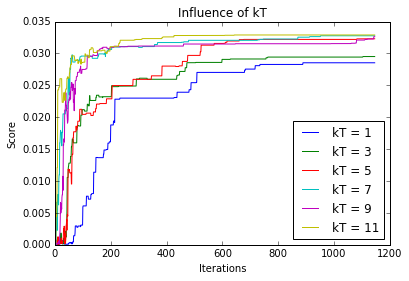

In [26]:
kT = [1, 3, 5, 7, 9, 11]

for i in kT:
    peptide_SA, fitness, temperature = simulated_annealing(peptidesize=20, Tmax=1e-3, Tmin=1e-8, pmut=0.1, r=0.99, kT=i, scoring=score_peptide)
    print(fitness[-1], peptide_SA)
    plt.plot(fitness, label="kT = "+str(i))
    
plt.title('Influence of kT')
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.show()

0.00233910063565 AMMAMVDRIGSMESWFTKTF
0.0007669898299 AFDVKLDTHFRFPVTQFSMS
0.0122862174592 ESIENLFGPLIKQSLMSAIT
0.022242113503 TQEFVQVVPALFPTIVTEMV
0.0251481896572 HIIAKLMVAGLIASLYHYLH


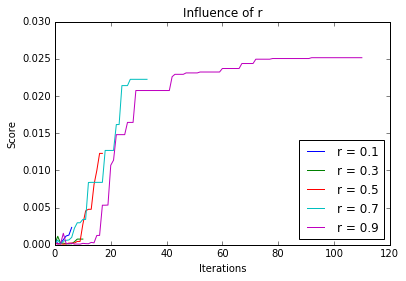

In [27]:
r = [0.1, 0.3, 0.5, 0.7, 0.9]

for i in r:
    peptide_SA, fitness, temperature = simulated_annealing(peptidesize=20, Tmax=1e-3, Tmin=1e-8, pmut=0.1, r=i, kT=5, scoring=score_peptide)
    print(fitness[-1], peptide_SA)
    plt.plot(fitness, label="r = "+str(i))
    
plt.title('Influence of r')
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.show()

Given the discussion about the parameters, we can now run the algorithm with optimal parameters

In [28]:
%%time
peptide_SA, fitness, temperature = simulated_annealing(peptidesize=20, Tmax=1e-2, Tmin=1e-9, pmut=0.1, r=0.99, kT=7, scoring=score_peptide)
print(fitness[-1], peptide_SA)

0.0321350175518 LLAGILAAIIGQIMEELYHW
Wall time: 1min 39s


When run on my computer, the algorithm with the optimal parameters takes 1m39 and the best peptide found is 'LLAGILAAIIGQIMEELYHW'. Thus far, it seems that SA gives a slightly better solution than Hill Climbing, but needs more time for it (when using these parameters).

In [29]:
def tournament_selection(scored_peptides):
    """
    Apply tournament selection on a list of scored peptides.

    Input:
        - scored_peptides : a list of scored peptides, each element is a tuple
                        of the form (score, peptide)
    Output:
        - selected_peptides : a list of peptides selected from scored_peptides
                        based on tournament selection (without the score)
    """
    selected_peptides = []
    while len(selected_peptides) < len(scored_peptides):
        #pick two random peptides and only put best one in next generation
        selected = max(choice(scored_peptides), choice(scored_peptides))
        selected_peptides.append(selected[1])      
    return selected_peptides



In [30]:
tournament_selection([(2,'ACILK'),(1,'RTHGY'),(0.5, 'EFTGK'),(4,'GHIKL')])

['ACILK', 'ACILK', 'ACILK', 'GHIKL']

In [31]:
def recombinate(population, pmut, pcross):
    """
    Recombinates a population of peptides.

    Inputs:
        - population : a list of peptides
        - pmut : probability of mutating an amino acid
        - pcross : probability of two peptides crossing over

    Output:
        - recombinated_population
    """
    # first step, mutate all peptides separatly
    mutated = []
    for i in population:
        mutated.append(mutate_peptide(i, pmut=pmut))
     
    # second step, recombination
    recombinated_population = []
    while len(mutated) > 1:
        pep1 = choice(mutated)
        mutated.remove(pep1)
        pep2 = choice(mutated)
        mutated.remove(pep2)
        if random() <= pcross:
            cross1, cross2 = crossover_peptides(pep1, pep2)
            recombinated_population += [cross1, cross2]
        else:
            recombinated_population += [pep1, pep2]
    if mutated != []:
        recombinated_population += mutated
    # the population with mutation an cross over applied to
    return recombinated_population

In [32]:
recombinate(['ACGTHK','KLMPTU','QSDFGS','QFSCDE'], pmut=0.5, pcross=0.5)

['QFSCDS', 'KVQRLU', 'AIGIHV', 'QYDSPS']

In [33]:
def genetic_algorithm(peptidesize, n_iterations, popsize, pmut, pcross, scoring=score_peptide):
    """
    Uses a genetic algorithm to find a peptide with a high score for
    antimicrobial activity.

    Inputs:
        - peptidesize : length of the peptide
        - n_iterations : number of iterations (generations)
        - popsize : size of the population
        - pmut : probability of mutating an amino acid in the peptide
        - pcross : probability of performing a crossover
        - scoring : the scoring function used for the peptides

    Outputs:
        - best_peptide : best found peptide
        - best_fitness_iteration : best scores obtained through the iterations
    """
   
    # initialize population
    population = []
    for _ in range(popsize):
        peptide = ''
        for _ in range(peptidesize):
            peptide += choice(amino_acids)
        population.append(peptide)

    # score peptides
    scored_peptides = [(scoring(peptide), peptide) for peptide in population]
    best_fitness, best_peptide = max(scored_peptides)

    best_fitness_iteration = [best_fitness]

    for i in range(n_iterations):
        # select population
        new_pop = tournament_selection(scored_peptides)
        # recombinate population
        new_pop_rec = recombinate(new_pop, pmut, pcross)
        # elitism
        # remove one random element from new population and replace it by most 'fit' element from previous generation
        new_pop_rec.remove(choice(new_pop_rec))
        population = new_pop_rec + [best_peptide]
        # score peptides
        scored_peptides = [(scoring(peptide), peptide) for peptide in population]
        # select best
        best_fitness, best_peptide = max(scored_peptides)
        best_fitness_iteration.append(best_fitness)

    return best_peptide, best_fitness_iteration

In [34]:
%%time
peptide_GA, best_fitness_iteration = genetic_algorithm(peptidesize=20, n_iterations=100,
                                        popsize=50, pmut=0.02, pcross=0.8, scoring=score_peptide)

Wall time: 9.64 s


TAVFISLINQIISSLVATVN 0.0322984374504


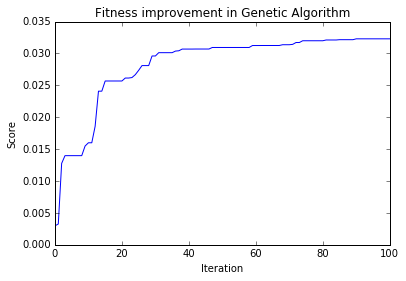

In [35]:
print(peptide_GA, best_fitness_iteration[-1])
# make a plot for the genetic algorithm
plt.plot(best_fitness_iteration)
plt.title('Fitness improvement in Genetic Algorithm')
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.show()

DESCRIBE THE EFFECT OF THE HYPERPARAMETERS. MAKE A PLOT TO ILLUSTRATE THE BEHAVIOUR BELOW.
Explanation below.

0.0117710330822 MVFTLLWFNIVTNLVDVIVN
0.0318495608089 DYFNEILSSIIAVVVASIIN
0.0328794207345 APLLSVIVGVISQIINEIMN
0.0332750380417 NMFSEIISSIIAVIASVATT
0.0326134642755 VAIIGTIINALLSVINELIE
0.0337020411766 FFSMISSLITSIVSTIISTV


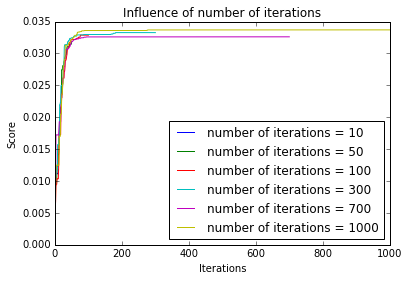

In [36]:
n_iterations = [10, 50, 100, 300, 700, 1000] 

for i in n_iterations:
    peptide_GA, fitness = genetic_algorithm(peptidesize=20, n_iterations=i, popsize=500, pmut=0.02, pcross=0.8, scoring=score_peptide)
    print(fitness[-1], peptide_GA)
    plt.plot(fitness, label="number of iterations = "+str(i))
    
plt.title('Influence of number of iterations')
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.show()

0.0318364688587 YQQHDHHRDYYDHFFDEFAD
0.0305752670116 DHYHDYYKDMPDTIINIIAE
0.0332129879792 IMAAIIASIISQMYHHMHYF
0.0336018323254 PILAAIIGTILEAISEVMSE


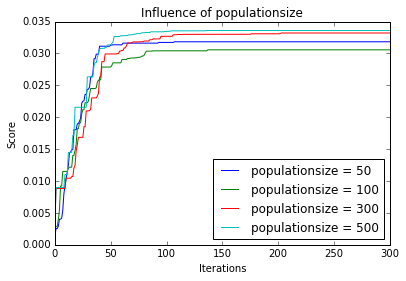

In [37]:
popsize = [50, 100, 300, 500] 

for i in popsize:
    peptide_GA, fitness = genetic_algorithm(peptidesize=20, n_iterations=300, popsize=i, pmut=0.02, pcross=0.8, scoring=score_peptide)
    print(fitness[-1], peptide_GA)
    plt.plot(fitness, label="populationsize = "+str(i))
    
plt.title('Influence of populationsize')
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.show()

0.0333021311938 EEMFHFLAEMISTILAGIIT
0.0309265419643 LSMLIGGIVEALSEILEAII
0.0162999003069 AYTSTTVQGVIEDFIRTLDE
0.0151413571874 LLFSLITQLLGGIYSWLTDE


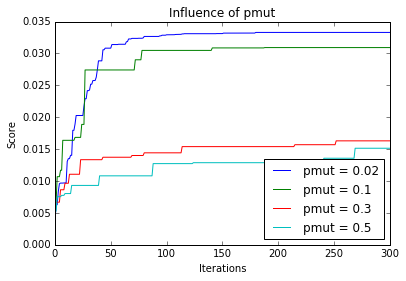

In [38]:
pmut = [0.02, 0.10, 0.3, 0.5]
    
for i in pmut:
    peptide_GA, fitness = genetic_algorithm(peptidesize=20, n_iterations=300, popsize=500, pmut=i, pcross=0.8, scoring=score_peptide)
    print(fitness[-1], peptide_GA)
    plt.plot(fitness, label="pmut = "+str(i))
    
plt.title('Influence of pmut')
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.show()

0.033398504258 AFLASLANVIMNLISTIVST
0.0336967742801 AMSSLITAILASLINTVSEQ
0.0335868115089 NIISTLLSSIISIIASAVSK
0.0337299232439 FIAAIASIISTIVSTILEEL


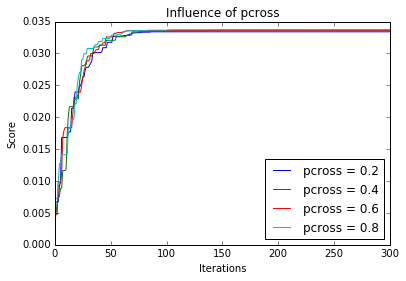

In [39]:
pcross = [0.2, 0.4, 0.6, 0.8]
    
for i in pcross:
    peptide_GA, fitness = genetic_algorithm(peptidesize=20, n_iterations=300, popsize=500, pmut=0.02, pcross=i, scoring=score_peptide)
    print(fitness[-1], peptide_GA)
    plt.plot(fitness, label="pcross = "+str(i))
    
plt.title('Influence of pcross')
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.show()

The influence of the number of iterations can be seen in the first plot. In general, it seems that a higher number of iterations gives a higher score found in the end. However, the difference between for example 700 iterations and 1000 iterations is rather small, while it takes a lot more time. Moreover, the relation is not straightforward, e.g. a higher number of iterations can still give a slightly worse score because of the randomness of the initial peptide. Therefore, the choice of number of iterations is a bit of a trade-off between time and obtaining a slightly better solution. I would choose around 500 iterations.

Populationsize has a rather small effect, but the general trend shows increasing final scores for bigger populations. The plots lay very close together however, so we might as well choose a smaller population of around 300 and obtain almost the same result with less memory consumption (for storage of the population etc). 

The influence of the pmut parameter is very clear, the smaller this value, the better the optimal score. An explanation for this can be described as follows. When the pmut parameter is set high, the population of peptides changes very drastically in every step of the algorithm. Because of this, it's like the algorithm starts from a random peptide each time again. Therefore, the score doesn't really have a chance to improve significantly. On the other hand, if we would choose pmut too small, the peptides wouldn't change much (if we disregard the crossing over for a moment) and the iterations would be stuck in a local optimum. That's why also the choice of pmut is a trade-off, too low or too high values won't work. We need to use trial and error to find a good value and it will depend on the problem at hand. 

Eventually, for the pcross parameter, the effect seems to be very small and not straightforward. We cannot say that there is a clear relation. Therefore, the choice of pcross might be not so very important, if the other parameters are chosen well. 

Let's now run the algorithm again with optimal parameters:

In [40]:
%%time
peptide_GA, fitness = genetic_algorithm(peptidesize=20, n_iterations=500, popsize=300, pmut=0.02, pcross=0.4, scoring=score_peptide)
print(fitness[-1], peptide_GA)

0.0332878525145 FVGVLVAVINELINSLAETA
Wall time: 6min 21s


**Comparison of the three algorithms**

First, let's look at the time needed for running the algorithms again: 

- for Hill climbing, this was around 20sec per run
- for Simulated Annealing, our example ran 1m39s 
- for our Genetic algorithm, it took 6m21s

The choice of the algorithm depends on the size of the problem, since the algorithms take more time for larger problems. For very large problems, the most time consuming algorithm will thus be a less suited choice, while for smaller problems it might be a very good choice because it gives the best solution. As a first choice, I would try the hill climbing algorithm because it takes very little time. We can get an idea of the order of magnitude of the scores and we can quickly try different possibilities which will each give another solution and pick the best one. This is a good approach for large problems, because we don't increase the time exponentially by running the algorithm multiple times. For smaller problems, I would choose the Genetic algorithm, because it gave the best result. However, this one has to run for a long time already for peptides of 20, so choosing this for larger proteins might take too much time. A compromise between the two would then be simulated annealing, which can also give very good scores and takes less time then the genetic algorithm (but more then hill climbing). We could also note that the genetic algorithm has a much more extended code complexity compared to the other two, so this could also be a reason not to choose it. 

One other thing that I would also try is to do some quick runs with hill climbing and picking out the best solutions. After that, I would adjust the function for simulated annealing and genetic algorithm such that it can start from a defined peptide. In this way, we can search more efficiently (thus needing less time) in the correct region and this would lead to a better solution than the initial one from hill climbing, but in less time compared to the original SA and GA algorithms as they are implemented here.

A last remark could be that the crossing over method used here could also be changed by which different (and possibly better) solutions would be obtained. The crossing over that we used here might be not very representative for the one that occurs in nature so it would be worth it to try other ones. However, trying all these different methods and parameters is an optimalization problem on it's own. 

The best peptide I encountered was 'EHIMSAIISMISTILSTAAQ', with a score of 0.0338499747258, obtained with the genetic algorithm. The parameters that were used in this run were:
- n_iterations = 300
- popsize = 500
- pmut = 0.02
- pcross = 0.4.


## References

Floreano, D. and Mattiussi, C., *'Bio-Inspired Artificial Intelligence'*. MIT Press (2008) [link](http://baibook.epfl.ch/)

Song, L.,Fukumizu, K. and Gretton, A. (2013), *'Kernel embeddings of conditional distributions'*. IEEE Signal Processing Magazine 30(4):98-111